In [2]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_classification
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

(500, 2)
(500,)


Using Theano backend.


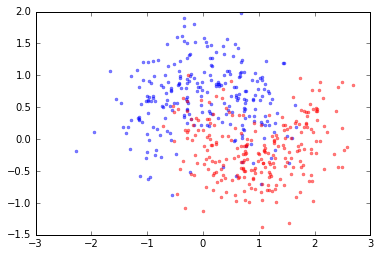

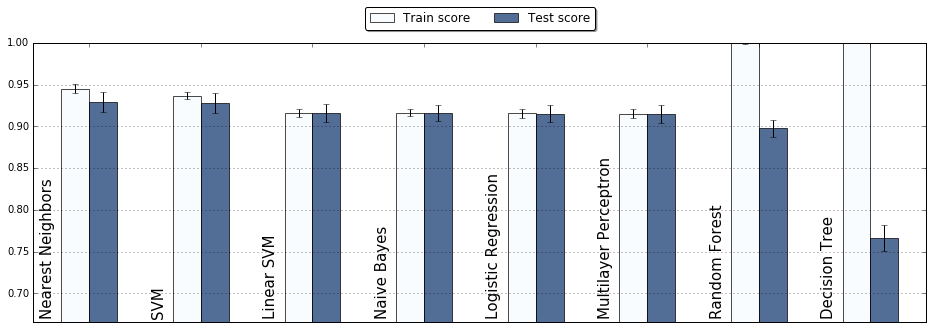

In [3]:
data, label = make_moons(n_samples=500, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.', alpha=.5);
plt.plot(data[label1,0], data[label1,1],'r.', alpha=.5);
scores, confusions, predictions, probs = poly(data,label, n_folds=3, verbose=False, save=False, scale=True,
                                       feature_selection=False, scoring='auc', concurrency=1)
plot(scores)

In [4]:
scores


Multilayer Perceptron           Nearest Neighbors                 SVM  \
                  train      test             train      test     train   
0              0.919509  0.905045          0.950337  0.914045  0.941392   
1              0.908351  0.930033          0.937162  0.944477  0.932088   
2              0.918211  0.909856          0.947668  0.929162   0.93718   

            Linear SVM           Decision Tree           Random Forest  \
       test      train      test         train      test         train   
0   0.91284   0.920308  0.906179             1  0.744048      0.999837   
1  0.942807   0.909463  0.930904             1  0.777108             1   
2  0.927566   0.918462  0.910727             1  0.777108       0.99853   

            Logistic Regression           Naive Bayes            
       test               train      test       train      test  
0  0.883858            0.920417  0.905612    0.920562  0.908447  
1  0.901582            0.908208  0.929017    0.910323  0.929598  
2  0.908187            0.918247  0.910582    0.918211   0.90913

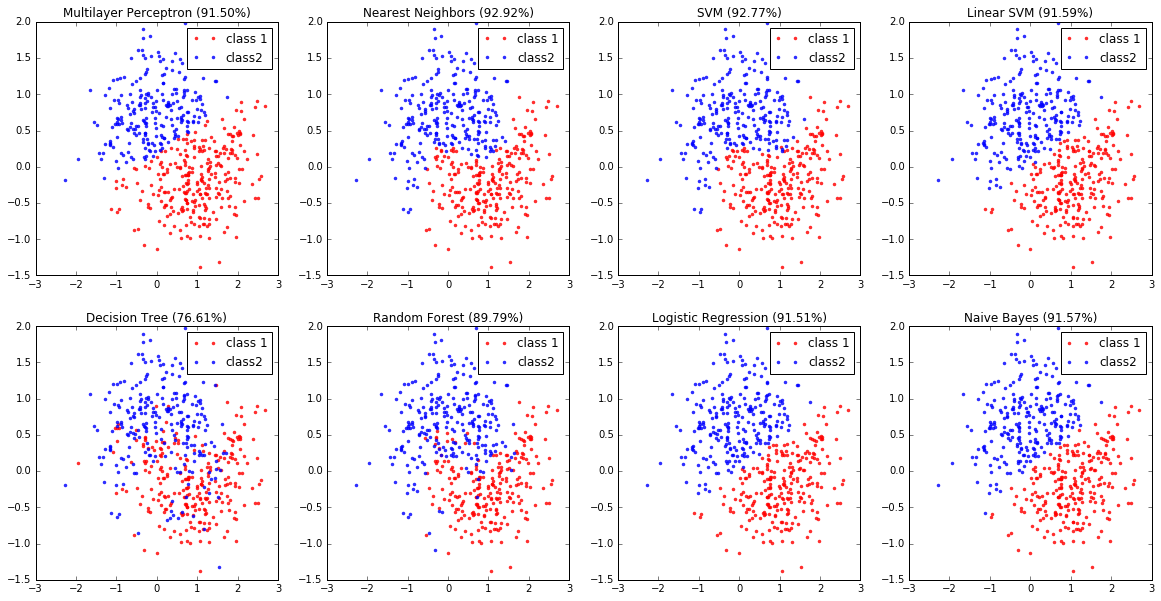

In [5]:
plt.figure(figsize=(20, 10))
for n, (key, pred) in enumerate(predictions.items()):
    plt.subplot(2,4,n+1)
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))

                                 mean       std       min       max
Multilayer Perceptron train  0.883477  0.026347  0.853880  0.904372
                      test   0.851042  0.030438  0.822146  0.882817
Nearest Neighbors     train  0.964866  0.009114  0.954371  0.970781
                      test   0.952085  0.025466  0.922691  0.967484
SVM                   train  0.972705  0.022508  0.958154  0.998629
                      test   0.952708  0.013189  0.937608  0.961968
Linear SVM            train  0.917453  0.006181  0.910320  0.921218
                      test   0.883243  0.036242  0.843517  0.914501
Decision Tree         train  1.000000  0.000000  1.000000  1.000000
                      test   0.708357  0.078914  0.640993  0.795181
Random Forest         train  0.999994  0.000010  0.999982  1.000000
                      test   0.941558  0.019962  0.925559  0.963927
Logistic Regression   train  0.900153  0.029632  0.866609  0.922769
                      test   0.867119  0.033419 

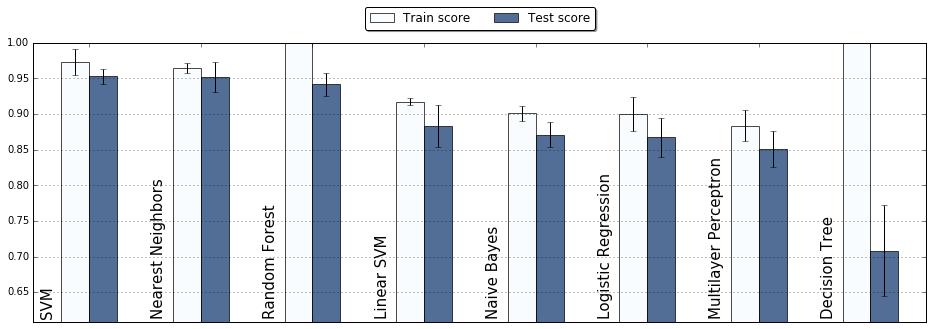

In [6]:
data, label = make_classification(n_samples=500, n_features=20,
                                      n_informative=5, n_redundant=2,
                                      n_repeated=0, n_classes=2,
                                      n_clusters_per_class=2, weights=None,
                                      flip_y=0.01, class_sep=1.0,
                                      hypercube=True, shift=0.0,
                                      scale=1.0, shuffle=True,
                                      random_state=None)
scores, confusions, predictions, probas = poly(data, label, n_folds=3, verbose=True,
                                       feature_selection=True, save=False, concurrency=1)
plot(scores)

In [7]:
for key, val in confusions.items():
    print(key)
    print(val)

SVM
[[ 212.   37.]
 [  25.  226.]]
Decision Tree
[[ 184.   65.]
 [  81.  170.]]
Nearest Neighbors
[[ 213.   36.]
 [  29.  222.]]
Logistic Regression
[[ 193.   56.]
 [  41.  210.]]
Random Forest
[[ 208.   41.]
 [  26.  225.]]
Naive Bayes
[[ 179.   70.]
 [  35.  216.]]
Multilayer Perceptron
[[ 170.   79.]
 [  29.  222.]]
Linear SVM
[[ 200.   49.]
 [  40.  211.]]


In [8]:
probs.head()

,Multilayer Perceptron,Nearest Neighbors,SVM,Linear SVM,Decision Tree,Random Forest,Logistic Regression,Naive Bayes
0,0.278250,0.85,0.863952,-0.149255,1.0,0.736842,0.606827,0.608090
1,0.721750,0.15,0.136048,1.097496,0.0,0.263158,0.393173,0.391910
2,0.035628,0.15,0.107284,-0.834021,0.0,0.000000,0.044374,0.031618
3,0.964372,0.85,0.892716,-1.414894,1.0,1.000000,0.955626,0.968382
4,0.528276,0.85,0.905124,0.796814,1.0,0.947368,0.912409,0.937828
